In [2]:
import sympy
import numpy as np
from sympy import sin, cos

sympy.init_printing()  # for pretty printing

**Spherical**

In [66]:
syms = sympy.symbols("theta phi")
theta, phi = syms
R = sympy.symbols("R")
m = sympy.Array(sympy.diag(R**2, R**2 * sin(theta)**2))
m


⎡ 2            ⎤
⎢R       0     ⎥
⎢              ⎥
⎢     2    2   ⎥
⎣0   R ⋅sin (θ)⎦

**Schwarzschild**

In [80]:
syms = sympy.symbols("t r theta phi")
t, r, theta, phi = syms
M = sympy.symbols("M")
gtt = -(1-(2*M/r))
grr = 1/ (-gtt)
m = sympy.Array(sympy.diag(gtt, grr, r**2, r**2 * sin(theta)**2))
m

⎡2⋅M                               ⎤
⎢─── - 1      0      0       0     ⎥
⎢ r                                ⎥
⎢                                  ⎥
⎢             1                    ⎥
⎢   0     ─────────  0       0     ⎥
⎢           2⋅M                    ⎥
⎢         - ─── + 1                ⎥
⎢            r                     ⎥
⎢                                  ⎥
⎢                     2            ⎥
⎢   0         0      r       0     ⎥
⎢                                  ⎥
⎢                         2    2   ⎥
⎣   0         0      0   r ⋅sin (θ)⎦

**2-D toro**

In [49]:
syms = sympy.symbols("r phi")
r, phi = syms
R = sympy.symbols("R")
m = sympy.Array(sympy.diag((R + r*cos(phi))**2, r**2))
m

⎡              2    ⎤
⎢(R + r⋅cos(φ))   0 ⎥
⎢                   ⎥
⎢                  2⎥
⎣       0         r ⎦

**Wormhole**

In [4]:
syms = sympy.symbols("t r theta phi")
t, r, theta, phi = syms
b = sympy.symbols("b")
gtt = (b**2 + r**2)
gpp = gtt * sin(theta)**2
m = sympy.Array(sympy.diag(-1, 1, gtt, gpp))
m

⎡-1  0     0             0        ⎤
⎢                                 ⎥
⎢0   1     0             0        ⎥
⎢                                 ⎥
⎢        2    2                   ⎥
⎢0   0  b  + r           0        ⎥
⎢                                 ⎥
⎢                ⎛ 2    2⎞    2   ⎥
⎣0   0     0     ⎝b  + r ⎠⋅sin (θ)⎦

In [7]:
m_inv = m.applyfunc(lambda x: 0 if x == 0 else 1/x)
m_inv

⎡-1  0     0             0        ⎤
⎢                                 ⎥
⎢0   1     0             0        ⎥
⎢                                 ⎥
⎢          1                      ⎥
⎢0   0  ───────          0        ⎥
⎢        2    2                   ⎥
⎢       b  + r                    ⎥
⎢                                 ⎥
⎢                        1        ⎥
⎢0   0     0     ─────────────────⎥
⎢                ⎛ 2    2⎞    2   ⎥
⎣                ⎝b  + r ⎠⋅sin (θ)⎦

Compute [**Christoffel symbols**](https://hirata10.github.io/ph6820/lec08_christoffel.pdf) (section VI) with all three down indices:

In [5]:
dim = m.shape[0]
ch = sympy.MutableDenseNDimArray(range(dim*dim*dim), (dim,dim,dim))*0
for i in range(ch.shape[0]):
  for j in range(ch.shape[1]):
    for k in range(ch.shape[2]):
      ch[i,j,k] = 0.5 * (m[j,i].diff(syms[k]) + m[i,k].diff(syms[j]) - m[k,j].diff(syms[i]))
ch

⎡                                                                             
⎢              ⎡0  0    0           0       ⎤  ⎡0    0      0                 
⎢⎡0  0  0  0⎤  ⎢                            ⎥  ⎢                              
⎢⎢          ⎥  ⎢0  0    0           0       ⎥  ⎢0    0    1.0⋅r               
⎢⎢0  0  0  0⎥  ⎢                            ⎥  ⎢                              
⎢⎢          ⎥  ⎢0  0  -1.0⋅r        0       ⎥  ⎢0  1.0⋅r    0                 
⎢⎢0  0  0  0⎥  ⎢                            ⎥  ⎢                              
⎢⎢          ⎥  ⎢                        2   ⎥  ⎢                      ⎛ 2    2
⎢⎣0  0  0  0⎦  ⎣0  0    0     -1.0⋅r⋅sin (θ)⎦  ⎣0    0      0    -1.0⋅⎝b  + r 
⎣                                                                             

                  ⎡0        0                     0                           
0              ⎤  ⎢                                                           
               ⎥  ⎢                                

Raise first index via metric multiplication (tensorproduct followed by contration on the selected indices - one up from metric, first down from Christoffel symbol-):

In [8]:
temp = sympy.tensorproduct(m_inv, ch)
#ch = temp[:,0,0,:,:]  + temp[:,1,1,:,:]
ch = sympy.tensorcontraction(temp,(1,2))
#ch = sum([sympy.simplify(temp[:,i,i,:,:]) for i in range(dim)],sympy.MutableDenseNDimArray(range(dim*dim*dim), (dim,dim,dim))*0)
ch

⎡                                                                             
⎢                                              ⎡0     0        0             0
⎢                                              ⎢                              
⎢              ⎡0  0    0           0       ⎤  ⎢             1.0⋅r            
⎢⎡0  0  0  0⎤  ⎢                            ⎥  ⎢0     0     ───────          0
⎢⎢          ⎥  ⎢0  0    0           0       ⎥  ⎢             2    2           
⎢⎢0  0  0  0⎥  ⎢                            ⎥  ⎢            b  + r            
⎢⎢          ⎥  ⎢0  0  -1.0⋅r        0       ⎥  ⎢                              
⎢⎢0  0  0  0⎥  ⎢                            ⎥  ⎢    1.0⋅r                     
⎢⎢          ⎥  ⎢                        2   ⎥  ⎢0  ───────     0             0
⎢⎣0  0  0  0⎦  ⎣0  0    0     -1.0⋅r⋅sin (θ)⎦  ⎢    2    2                    
⎢                                              ⎢   b  + r                     
⎢                                              ⎢    

Compute the **[Rieman](https://hirata10.github.io/ph6820/lec10_curvature.pdf) curvature tensor** (section III):

In [9]:
rie = sympy.MutableDenseNDimArray(range(dim*dim*dim*dim), (dim,dim,dim,dim))*0
for i in range(rie.shape[0]):
  for j in range(rie.shape[1]):
    for k in range(rie.shape[2]):
      for l in range(rie.shape[3]):
        sum_1 = sum([ch[i,m,k]*ch[m,j,l] for m in range(dim)])
        sum_2 = sum([ch[i,m,l]*ch[m,j,k] for m in range(dim)])
        rie[i,j,k,l] = sympy.simplify(ch[i,j,l].diff(syms[k]) - ch[i,j,k].diff(syms[l]) + sum_1 - sum_2)
rie

⎡⎡0  0  0  0⎤                   ⎡0  0  0  0⎤                          ⎡0  0  0
⎢⎢          ⎥                   ⎢          ⎥                          ⎢       
⎢⎢0  0  0  0⎥                   ⎢0  0  0  0⎥                          ⎢0  0  0
⎢⎢          ⎥                   ⎢          ⎥                          ⎢       
⎢⎢0  0  0  0⎥                   ⎢0  0  0  0⎥                          ⎢0  0  0
⎢⎢          ⎥                   ⎢          ⎥                          ⎢       
⎢⎣0  0  0  0⎦                   ⎣0  0  0  0⎦                          ⎣0  0  0
⎢                                                                             
⎢                                                               ⎡0     0      
⎢                                                               ⎢             
⎢                                                               ⎢             
⎢                                                               ⎢            -
⎢⎡0  0  0  0⎤                   ⎡0  0  0  0⎤        

Now compute the **Ricci tensor** by contracting the Rieman tensor:

In [10]:
#ric = rie[0,:,0,:] + rie[1,:,1,:]
ric = sympy.tensorcontraction(rie,(0,2))
#ric = sum([rie[i,:,i,:] for i in range(dim)],sympy.MutableDenseNDimArray(range(dim*dim), (dim,dim))*0)
ric

⎡0      0       0  0⎤
⎢                   ⎥
⎢          2        ⎥
⎢    -2.0⋅b         ⎥
⎢0  ──────────  0  0⎥
⎢            2      ⎥
⎢   ⎛ 2    2⎞       ⎥
⎢   ⎝b  + r ⎠       ⎥
⎢                   ⎥
⎢0      0       0  0⎥
⎢                   ⎥
⎣0      0       0  0⎦

Note that due to symmetries, we could have chosen different down indices and get the analogous result:

In [11]:
#rie[0,:,:,0] + rie[1,:,:,1]
sympy.tensorcontraction(rie,(0,3))
#sum([rie[i,:,:,i] for i in range(dim)],sympy.MutableDenseNDimArray(range(dim*dim), (dim,dim))*0)


⎡0               0               0  0⎤
⎢                                    ⎥
⎢                   2                ⎥
⎢              2.0⋅b                 ⎥
⎢0  ───────────────────────────  0  0⎥
⎢        4        2  2        4      ⎥
⎢   1.0⋅b  + 2.0⋅b ⋅r  + 1.0⋅r       ⎥
⎢                                    ⎥
⎢0               0               0  0⎥
⎢                                    ⎥
⎣0               0               0  0⎦

and the other option would be all zeros:

In [12]:
#rie[0,0,:,:] + rie[1,1,:,:]
sympy.tensorcontraction(rie,(0,1))
#sum([rie[i,i,:,:] for i in range(dim)],sympy.MutableDenseNDimArray(range(dim*dim), (dim,dim))*0)


⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

The Ricci tensor now has two down indices. To compute the Ricci scalar, first raise one index in the Ricci tensor, (via metric multiplication: tensor product followed by contraction):

In [17]:
temp = sympy.tensorproduct(m_inv,ric)
#ric2 = temp[0,:,0,:] + temp[1,:,1,:]
ric2 = sympy.tensorcontraction(temp,(0,2))
#ric2 = sum([temp[i,:,i,:] for i in range(dim)],sympy.MutableDenseNDimArray(range(dim*dim), (dim,dim))*0)
ric2

⎡0      0       0  0⎤
⎢                   ⎥
⎢          2        ⎥
⎢    -2.0⋅b         ⎥
⎢0  ──────────  0  0⎥
⎢            2      ⎥
⎢   ⎛ 2    2⎞       ⎥
⎢   ⎝b  + r ⎠       ⎥
⎢                   ⎥
⎢0      0       0  0⎥
⎢                   ⎥
⎣0      0       0  0⎦

And finally contract the Ricci tensor to get the **Ricci scalar**:

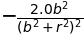

In [15]:
#ric_s = ric2[0,0] + ric2[1,1]
ric_s = sympy.tensorcontraction(ric2,(0,1))
#ric_s = sum([ric2[i,i] for i in range(dim)])
ric_s

[**Einstein Tensor**](https://hirata10.github.io/ph6820/lec11_efe.pdf) (section IV.A, equation 15), with down indices, is then:

In [16]:
ein = ric - 0.5 * ric_s * m
ein

⎡       2                                       ⎤
⎢ -1.0⋅b                                        ⎥
⎢──────────      0          0           0       ⎥
⎢         2                                     ⎥
⎢⎛ 2    2⎞                                      ⎥
⎢⎝b  + r ⎠                                      ⎥
⎢                                               ⎥
⎢                   2                           ⎥
⎢             -1.0⋅b                            ⎥
⎢    0       ──────────     0           0       ⎥
⎢                     2                         ⎥
⎢            ⎛ 2    2⎞                          ⎥
⎢            ⎝b  + r ⎠                          ⎥
⎢                                               ⎥
⎢                              2                ⎥
⎢                         1.0⋅b                 ⎥
⎢    0           0       ───────        0       ⎥
⎢                         2    2                ⎥
⎢                        b  + r                 ⎥
⎢                                               ⎥


which is 0 as expected for spherical polar coordinates, given that they correspond to flat spacetime.